In [2]:
import os
import numpy as np
import pandas as pd
import pypsa
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [54]:
network_folder = "networks/outputs/solved"

!NETWORK_FOLDER="networks/outputs/solved" python scripts/difficult_periods_MODIFIED.py

# Load the CSV file into a DataFrame
df = pd.read_csv(f"{network_folder}/difficult_periods.csv")

# Display the first few rows of the DataFrame
df.head()

/home/cs/miniforge3/envs/RD_env/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=4178) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


INFO:pypsa.io:Imported network 2018_181_90m_c1.25_Co2L0.0-1H_MC_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units
INFO:pypsa.io:Imported network 2017_181_90m_c1.25_Co2L0.0-1H_MC_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units
INFO:pypsa.io:Imported network 2018_181_90m_c1.25_Co2L0.0-1H_SC_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units
INFO:pypsa.io:Imported network 2018_181_90m_c1.25_Co2L0.0-1H_SC_solved_test.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units
INFO:pypsa.io:Imported network 2019_181_90m_c1.25_Co2L0.0-1H_MC_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units
INFO:root:Identified 2 difficult periods.


,start,end,peak_hour,file_name
0,2019-01-20 14:00:00+00:00,2019-01-24 22:00:00+00:00,2019-01-24 17:00:00+00:00,2018_181_90m_c1.25_Co2L0.0-1H_MC_solved.nc
1,2019-01-20 15:00:00+00:00,2019-01-24 21:00:00+00:00,2019-01-24 17:00:00+00:00,2018_181_90m_c1.25_Co2L0.0-1H_SC_solved.nc


In [43]:
n = pypsa.Network("networks/outputs/solved/2018_181_90m_c1.25_Co2L0.0-1H_SC_solved_test.nc")

# Define the last week of January (adjust year if needed)
last_week_start = pd.Timestamp("2023-01-19 00:00:00")  # Start date for the last week of January
last_week_end = pd.Timestamp("2023-01-25 23:00:00")    # End date for the last week of January

# Filter snapshots for the last week of January
january_last_week_snapshots = n.snapshots[(n.snapshots >= last_week_start) & (n.snapshots <= last_week_end)]
print(january_last_week_snapshots)

INFO:pypsa.io:Imported network 2018_181_90m_c1.25_Co2L0.0-1H_SC_solved_test.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


DatetimeIndex([], dtype='datetime64[ns]', name='snapshot', freq=None)


In [41]:
specific_day = "2023-01-28"
day_start = pd.Timestamp(specific_day + " 00:00:00")  # Start of the day
day_end = pd.Timestamp(specific_day + " 23:00:00")    # End of the day (last hour)

# Filter snapshots for the specific day
specific_day_snapshots = n.snapshots[(n.snapshots >= day_start) & (n.snapshots <= day_end)]
print(specific_day_snapshots)

DatetimeIndex([], dtype='datetime64[ns]', name='snapshot', freq=None)


In [45]:
print("Available snapshots:", n.snapshots[4850:4910])

Available snapshots: DatetimeIndex(['2019-01-19 02:00:00', '2019-01-19 03:00:00',
               '2019-01-19 04:00:00', '2019-01-19 05:00:00',
               '2019-01-19 06:00:00', '2019-01-19 07:00:00',
               '2019-01-19 08:00:00', '2019-01-19 09:00:00',
               '2019-01-19 10:00:00', '2019-01-19 11:00:00',
               '2019-01-19 12:00:00', '2019-01-19 13:00:00',
               '2019-01-19 14:00:00', '2019-01-19 15:00:00',
               '2019-01-19 16:00:00', '2019-01-19 17:00:00',
               '2019-01-19 18:00:00', '2019-01-19 19:00:00',
               '2019-01-19 20:00:00', '2019-01-19 21:00:00',
               '2019-01-19 22:00:00', '2019-01-19 23:00:00',
               '2019-01-20 00:00:00', '2019-01-20 01:00:00',
               '2019-01-20 02:00:00', '2019-01-20 03:00:00',
               '2019-01-20 04:00:00', '2019-01-20 05:00:00',
               '2019-01-20 06:00:00', '2019-01-20 07:00:00',
               '2019-01-20 08:00:00', '2019-01-20 09:00:00',
   

In [3]:
n2 = pypsa.Network("networks/outputs/solved/1993_181_90m_c1.25_Co2L0.0-1H_MC_solved.nc")
#n2 = pypsa.Network("networks/workflow_data/networks/stressful-weather/2019_181_90m_c1.25_Co2L0.0-1H.nc")
#n2 = pypsa.Network("networks/workflow_data/results/stressful-weather/optimum/2019_181_90m_c1.25_Co2L0.0-1H.nc")

INFO:pypsa.io:Imported network 1993_181_90m_c1.25_Co2L0.0-1H_MC_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


In [48]:
total_load = n2.buses_t["marginal_price"]
total_load

Bus,AL0 0,AT0 0,BA0 0,BE0 0,BE0 1,BG0 0,CH0 0,CZ0 0,DE0 0,DE0 1,...,PL0 2,PL0 3,PT0 0,RO0 0,RS0 0,SE1 0,SE1 1,SE1 2,SI0 0,SK0 0
snapshot,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00,17.180620,19.909724,17.395483,12.615080,12.972002,17.094409,15.797352,11.381425,11.064542,13.508430,...,0.015055,0.015003,21.068955,17.063623,17.138461,1.849842,0.015128,-0.000163,18.311803,13.961670
2019-07-01 01:00:00,17.179864,19.887834,17.392455,12.602171,12.958639,17.095678,15.775103,11.380846,11.051062,13.493330,...,0.015081,0.015003,21.068867,17.065857,17.137997,1.848191,0.015142,-0.000126,18.301740,13.943133
2019-07-01 02:00:00,17.177261,19.888147,17.386928,12.602275,12.958719,17.100378,15.775069,11.380822,11.051339,13.493459,...,0.015049,0.015006,21.067981,17.074339,17.135323,1.848433,0.015416,-0.000089,18.297418,13.957277
2019-07-01 03:00:00,17.141954,17.300599,17.149382,13.540148,13.764081,17.144728,15.647819,11.378784,14.933074,14.136834,...,10.330907,11.073637,21.067631,17.147053,17.139499,11.378754,11.241857,11.030084,17.196082,13.844193
2019-07-01 04:00:00,17.128120,16.448474,17.066008,13.775358,13.984761,17.163791,15.774964,15.038438,15.904955,14.093962,...,14.751196,14.821443,21.068632,17.179133,17.138331,11.553015,11.378762,11.108096,16.829969,14.623074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 19:00:00,17.141305,16.918728,17.227048,14.725309,14.781709,17.163861,15.824036,16.021413,16.033407,15.190497,...,16.124547,15.970240,22.680319,17.186060,17.113823,11.848511,11.378959,10.651742,17.745554,16.406245
2020-06-30 20:00:00,17.137571,16.956211,17.162873,14.725652,14.781880,17.163822,15.817577,15.957020,15.992039,15.185205,...,16.001433,15.886376,22.681670,17.182211,17.125760,11.848990,11.378886,10.650785,17.480038,16.211487
2020-06-30 21:00:00,17.121929,15.957176,16.999680,13.999202,14.111597,17.165191,15.455282,14.740804,14.996196,14.094056,...,14.416696,14.555842,22.681118,17.179114,17.147090,11.732295,11.378821,10.831201,16.597398,14.162710


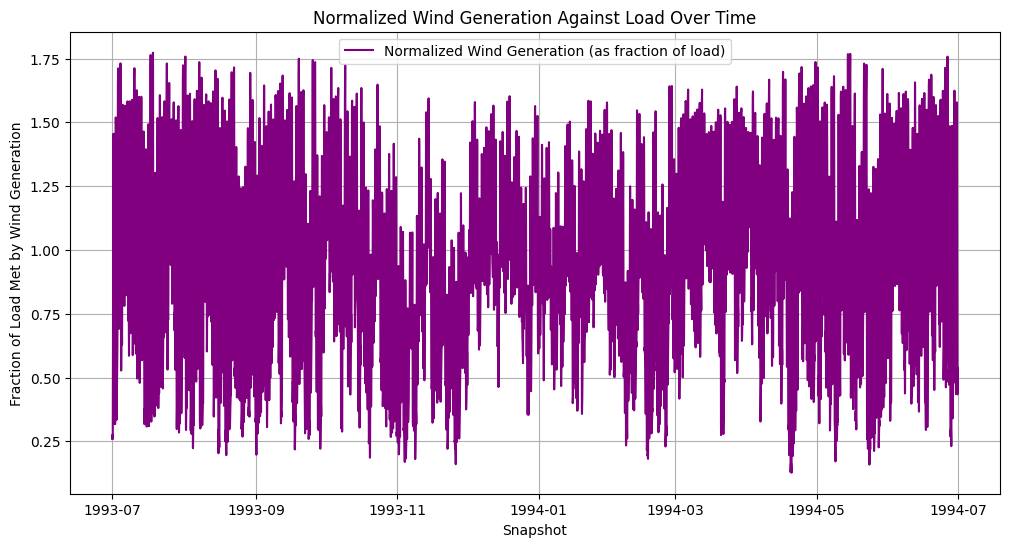

In [6]:
wind_generators = n2.generators.index[
    n2.generators.carrier.isin(['onwind', 'offwind-dc', 'offwind-ac', "solar"])
]

# Calculate total wind generation per snapshot
total_wind_generation = n2.generators_t.p[wind_generators].sum(axis=1)

# Calculate total load per snapshot
total_load = n2.loads_t.p_set.sum(axis=1)

# Normalize wind generation against load
normalized_wind_generation = total_wind_generation / total_load

# Plot normalized wind generation over time
plt.figure(figsize=(12, 6))
plt.plot(normalized_wind_generation, label="Normalized Wind Generation (as fraction of load)", color="purple")

# Adding labels and title
plt.xlabel("Snapshot")
plt.ylabel("Fraction of Load Met by Wind Generation")
plt.title("Normalized Wind Generation Against Load Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
wind_generators = n2.generators.index[
    n2.generators.carrier.isin(['solar']) #(['solar'])
]

# Calculate total wind generation per snapshot
total_wind_generation = n2.generators_t.p[wind_generators].sum().sum()

# Calculate total load per snapshot
total_load = n2.loads_t.p_set.sum().sum()

ratio = total_wind_generation/total_load
print(ratio)

# # Define wind generators
# wind_generators = n2.generators.index[
#     n2.generators.carrier.isin(['onwind', 'offwind-dc', 'offwind-ac'])
# ]

# # Slice to get every 96th snapshot
# snapshots_every_96 = n2.snapshots[::96]

# # Calculate total wind generation only for the selected snapshots
# total_wind_generation = n2.generators_t.p.loc[snapshots_every_96, wind_generators].sum().sum()

# # Calculate total load only for the selected snapshots
# total_load = n2.loads_t.p_set.loc[snapshots_every_96].sum().sum()

# # Calculate the ratio of total wind generation to total load for these snapshots
# ratio = total_wind_generation / total_load
# print(ratio)



0.3000006797638446


In [11]:
n2.storage_units

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,max_hours,efficiency_store,efficiency_dispatch,standing_loss,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
AL0 0 hydro,AL0 0,PQ,,1493.70,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,47.397202,0.000000,0.900000,0.0,0.0,1493.700000
AT0 0 PHS,AT0 0,PQ,,5044.30,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,True,True,307.461843,0.866025,0.866025,0.0,0.0,5044.300000
AT0 0 hydro,AT0 0,PQ,,3426.62,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,933.864858,0.000000,0.900000,0.0,0.0,3426.620000
BA0 0 PHS,BA0 0,PQ,,440.00,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,True,True,0.007907,0.866025,0.866025,0.0,0.0,440.000000
BA0 0 hydro,BA0 0,PQ,,1695.50,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,1474.491301,0.000000,0.900000,0.0,0.0,1695.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE1 0 H2,SE1 0,PQ,,0.00,0.0,True,0.0,inf,-1.0,1.0,...,False,NaN,True,True,168.000000,0.680000,0.500000,0.0,0.0,0.255148
SE1 1 H2,SE1 1,PQ,,0.00,0.0,True,0.0,inf,-1.0,1.0,...,False,NaN,True,True,168.000000,0.680000,0.500000,0.0,0.0,0.297865
SE1 2 H2,SE1 2,PQ,,0.00,0.0,True,0.0,inf,-1.0,1.0,...,False,NaN,True,True,168.000000,0.680000,0.500000,0.0,0.0,0.293015


In [9]:
n3 = pypsa.Network("networks/sample/solved/1993_181_90m_c1.25_Co2L0.0-1H.nc")

INFO:pypsa.io:Imported network 1993_181_90m_c1.25_Co2L0.0-1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


In [18]:
n3.storage_units_t.mu_upper
n2.lines['s_nom']
print(n2.storage_units)
print(n2.stores)


               bus control type    p_nom  p_nom_mod  p_nom_extendable  \
StorageUnit                                                             
AL0 0 hydro  AL0 0      PQ       1493.70        0.0             False   
AT0 0 PHS    AT0 0      PQ       5044.30        0.0             False   
AT0 0 hydro  AT0 0      PQ       3426.62        0.0             False   
BA0 0 PHS    BA0 0      PQ        440.00        0.0             False   
BA0 0 hydro  BA0 0      PQ       1695.50        0.0             False   
...            ...     ...  ...      ...        ...               ...   
SE1 0 H2     SE1 0      PQ          0.00        0.0              True   
SE1 1 H2     SE1 1      PQ          0.00        0.0              True   
SE1 2 H2     SE1 2      PQ          0.00        0.0              True   
SI0 0 H2     SI0 0      PQ          0.00        0.0              True   
SK0 0 H2     SK0 0      PQ          0.00        0.0              True   

             p_nom_min  p_nom_max  p_min_pu  p_max

In [52]:
# Calculate total wind generation per snapshot
total_wind_generation = n2.generators_t.p[wind_generators].sum(axis=0)
#total_wind_generation = n2.model['Generator-p'].loc[snapshots, wind_generators].sum()
print(total_wind_generation)

# Calculate total load per snapshot
total_load = n2.loads_t.p_set.sum(axis=1) #.sum(axis=0)
print(total_load)

Generator
AL1 0 offwind-ac     0.169566
AL1 0 onwind         0.122431
AT1 0 onwind         0.007676
AT1 1 onwind         4.441839
AT1 2 onwind         0.464353
                      ...    
SE2 5 onwind         1.336451
SE2 6 onwind        10.705323
SI1 0 offwind-ac     0.053646
SI1 0 onwind         0.242372
SK1 0 onwind         1.663191
Length: 334, dtype: float64
snapshot
1993-07-01 00:00:00    310925.404363
1993-07-01 01:00:00    305207.243705
1993-07-01 02:00:00    305620.123635
1993-07-01 03:00:00    316572.199968
1993-07-01 04:00:00    342553.528480
                           ...      
1994-06-30 19:00:00    414253.313065
1994-06-30 20:00:00    408451.690618
1994-06-30 21:00:00    383874.006693
1994-06-30 22:00:00    352172.171144
1994-06-30 23:00:00    332951.900072
Length: 8760, dtype: float64


## Snapshots analysis

In [66]:
ns = pypsa.Network("networks/outputs/solved/1993_181_90m_c1.25_Co2L0.0-1H_SC_solved.nc")

INFO:pypsa.io:Imported network 1993_181_90m_c1.25_Co2L0.0-1H_SC_solved.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


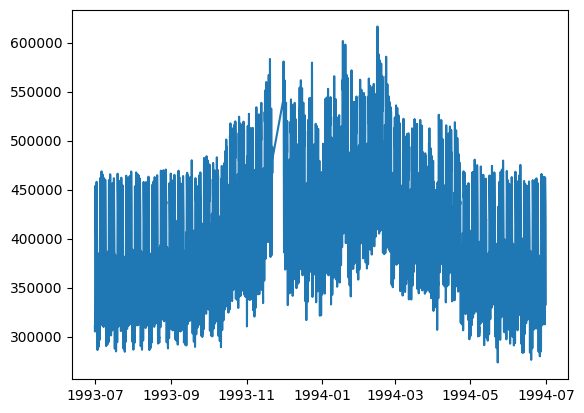

In [67]:
plt.plot(ns.loads_t.p_set.sum(axis=1))

In [13]:
print("Available snapshots:", ns.snapshots[4850:4910])

Available snapshots: DatetimeIndex(['1994-01-27 17:00:00', '1994-01-27 18:00:00',
               '1994-01-27 19:00:00', '1994-01-27 20:00:00',
               '1994-01-27 21:00:00', '1994-01-27 22:00:00',
               '1994-01-27 23:00:00', '1994-01-28 00:00:00',
               '1994-01-28 01:00:00', '1994-01-28 02:00:00',
               '1994-01-28 03:00:00', '1994-01-28 04:00:00',
               '1994-01-28 05:00:00', '1994-01-28 06:00:00',
               '1994-01-28 07:00:00', '1994-01-28 08:00:00',
               '1994-01-28 09:00:00', '1994-01-28 10:00:00',
               '1994-01-28 11:00:00', '1994-01-28 12:00:00',
               '1994-01-28 13:00:00', '1994-01-28 14:00:00',
               '1994-01-28 15:00:00', '1994-01-28 16:00:00',
               '1994-01-28 17:00:00', '1994-01-28 18:00:00',
               '1994-01-28 19:00:00', '1994-01-28 20:00:00',
               '1994-01-28 21:00:00', '1994-01-28 22:00:00',
               '1994-01-28 23:00:00', '1994-01-29 00:00:00',
   

In [71]:
ns.carriers
#ns.generators.carrier
# solar_generators = ns.generators.index[
#             ns.generators.carrier == 'solar'
#         ]
# solar_generators

,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
solar,0.0,#f9d002,Solar,inf,0.0
onwind,0.0,#235ebc,Onshore Wind,inf,0.0
biomass,0.0,#0c6013,Biomass,inf,0.0
offwind-ac,0.0,#6895dd,Offshore Wind (AC),inf,0.0
offwind-dc,0.0,#74c6f2,Offshore Wind (DC),inf,0.0
nuclear,0.0,#ff9000,Nuclear,inf,0.0
hydro,0.0,#08ad97,Reservoir & Dam,inf,0.0
PHS,0.0,#08ad97,Pumped Hydro Storage,inf,0.0
ror,0.0,#4adbc8,Run of River,inf,0.0


In [21]:
wind_generators = ns.generators.index[
            ns.generators.carrier.isin(['onwind', 'offwind-dc', 'offwind-ac'])
        ]
wind_generators

Index(['AL1 0 offwind-ac', 'AL1 0 onwind', 'AT1 0 onwind', 'AT1 1 onwind',
       'AT1 2 onwind', 'BA1 0 onwind', 'BE1 0 onwind', 'BE1 1 offwind-ac',
       'BE1 1 offwind-dc', 'BE1 1 onwind',
       ...
       'SE2 4 offwind-ac', 'SE2 4 offwind-dc', 'SE2 4 onwind',
       'SE2 5 offwind-ac', 'SE2 5 offwind-dc', 'SE2 5 onwind', 'SE2 6 onwind',
       'SI1 0 offwind-ac', 'SI1 0 onwind', 'SK1 0 onwind'],
      dtype='object', name='Generator', length=334)